In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
%matplotlib inline 

In [17]:
df = pd.read_csv("cluster_data.csv")
df.columns

Index(['Feature 1', 'Feature 2'], dtype='object')

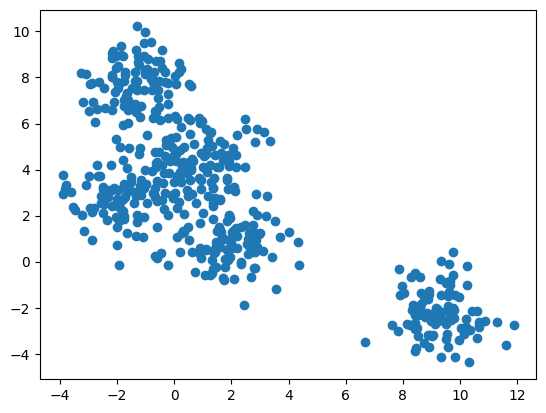

In [18]:
plt.scatter(df[["Feature 1"]].values , df[["Feature 2"]].values)

In [19]:
feature_mtx = df[['Feature 1', 'Feature 2']].values

In [20]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx , feature_mtx)


Z_using_dist_matrix = hierarchy.linkage(dist_matrix , 'complete')

C:\Users\Topsystem\AppData\Local\Temp\ipykernel_1096\1026132386.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix , 'complete')


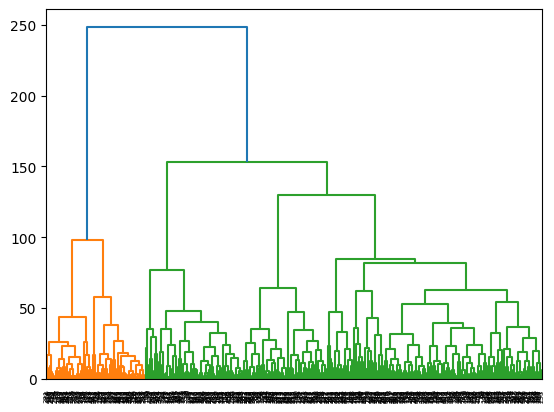

In [21]:
dendro = hierarchy.dendrogram(Z_using_dist_matrix)

In [28]:
agglom = AgglomerativeClustering(n_clusters=4 ,linkage="complete")
agglom.fit(dist_matrix)
clusters = agglom.labels_
df ["cluster"] = clusters

c:\Users\Topsystem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


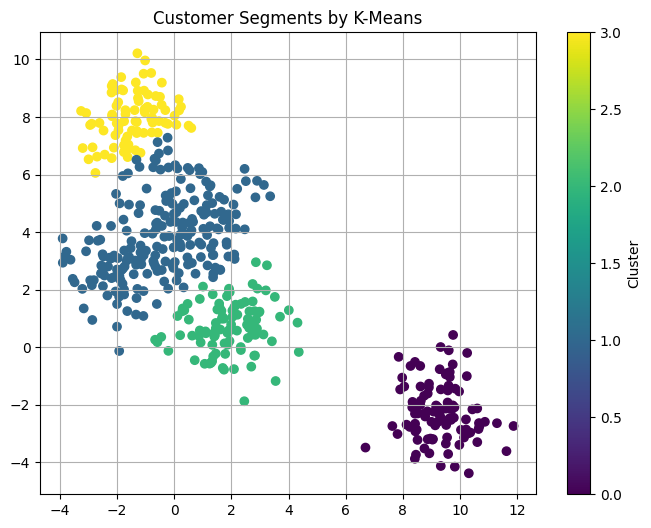

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df[["Feature 1"]].values , df[["Feature 2"]].values, c=clusters, cmap='viridis')
#plt.xlabel("Age")
#plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments by K-Means")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()